In [2]:
import pandas as pd

customers = pd.read_csv("customers_data.csv")
products = pd.read_csv("products_data.csv")
transactions = pd.read_csv("transactions_data.csv")

print(customers.shape)
print(products.shape)
print(transactions.shape)

customers.head()

(100, 4)
(20, 3)
(10000, 8)


,Company_ID,Company_Name,Company_Profit,Address
0,1.0,Tech Enterprises 1,80701.0,"EDSA, Barangay 606, Pasig, Philippines"
1,2.0,Global Partners 2,80511.0,"Commonwealth Ave, Barangay 789, Taguig, Philip..."
2,3.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines"
3,4.0,Prime Network 4,NaN,"Alabang-Zapote Rd, Barangay 202, Taguig, Phili..."
4,5.0,Elite Ventures 5,69427.0,"Ayala Avenue, Barangay 101, Makati, Philippines"


In [4]:
# Basic EDA for all datasets

def basic_eda(df, name):
    print(f"\n===== {name.upper()} =====")
    print("Shape:", df.shape)
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDuplicate Rows:", df.duplicated().sum())
    display(df.head())

basic_eda(customers, "customers")
basic_eda(products, "products")
basic_eda(transactions, "transactions")


===== CUSTOMERS =====
Shape: (100, 4)

Data Types:
Company_ID        float64
Company_Name       object
Company_Profit    float64
Address            object
dtype: object

Missing Values:
Company_ID        10
Company_Name       0
Company_Profit    12
Address            0
dtype: int64

Duplicate Rows: 0


,Company_ID,Company_Name,Company_Profit,Address
0,1.0,Tech Enterprises 1,80701.0,"EDSA, Barangay 606, Pasig, Philippines"
1,2.0,Global Partners 2,80511.0,"Commonwealth Ave, Barangay 789, Taguig, Philip..."
2,3.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines"
3,4.0,Prime Network 4,NaN,"Alabang-Zapote Rd, Barangay 202, Taguig, Phili..."
4,5.0,Elite Ventures 5,69427.0,"Ayala Avenue, Barangay 101, Makati, Philippines"



===== PRODUCTS =====
Shape: (20, 3)

Data Types:
Product_ID       float64
Product_Name      object
Product_Price     object
dtype: object

Missing Values:
Product_ID       2
Product_Name     0
Product_Price    0
dtype: int64

Duplicate Rows: 0


,Product_ID,Product_Name,Product_Price
0,1.0,FinPredictor Suite,"?140,000"
1,2.0,MarketMinder Analytics,"?168,000"
2,3.0,TrendWise Forecaster,"?100,800"
3,4.0,CustomerScope Insights,"?123,200"
4,5.0,SalesSync Optimizer,"?84,000"



===== TRANSACTIONS =====
Shape: (10000, 8)

Data Types:
Unnamed: 0          float64
Transaction_ID      float64
Company_ID          float64
Product_ID          float64
Quantity            float64
Transaction_Date     object
Product_Price       float64
Total_Cost          float64
dtype: object

Missing Values:
Unnamed: 0          1000
Transaction_ID      1000
Company_ID          1000
Product_ID          1000
Quantity            1000
Transaction_Date       0
Product_Price       1000
Total_Cost          1000
dtype: int64

Duplicate Rows: 0


,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,0.0,1.0,88.0,6.0,NaN,2024/03/26,194379.147964,1075200.0
1,1.0,2.0,29.0,19.0,16.0,"July 09, 2024",97930.993380,1428000.0
2,2.0,NaN,28.0,18.0,6.0,04/13/2024,126095.547778,940800.0
3,3.0,4.0,85.0,12.0,12.0,09-06-2023,NaN,1008000.0
4,4.0,5.0,47.0,3.0,8.0,07/06/2021,99575.609634,705600.0


In [8]:
import numpy as np
import pandas as pd

# Clean product price safely (removes ₱, ?, commas, spaces, etc.)
products["Product_Price"] = (
    products["Product_Price"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)  # keep only numbers and dot
)

products["Product_Price"] = pd.to_numeric(products["Product_Price"], errors="coerce")

# Check how many became NaN after cleaning
print("Missing Product_Price after cleaning:", products["Product_Price"].isna().sum())

products.head()

Missing Product_Price after cleaning: 0


,Product_ID,Product_Name,Product_Price
0,1.0,FinPredictor Suite,140000
1,2.0,MarketMinder Analytics,168000
2,3.0,TrendWise Forecaster,100800
3,4.0,CustomerScope Insights,123200
4,5.0,SalesSync Optimizer,84000


In [10]:
bad_prices = products.loc[products["Product_Price"].isna(), "Product_Price"]
bad_prices.head(20)


Series([], Name: Product_Price, dtype: int64)

In [12]:
raw_bad = products.loc[
    products["Product_Price"].astype(str).str.contains(r"[^0-9.,₱\s]", regex=True),
    "Product_Price"
]
raw_bad.head(20)


Series([], Name: Product_Price, dtype: int64)

In [14]:
# 1) Convert Transaction_Date to datetime
transactions["Transaction_Date"] = pd.to_datetime(transactions["Transaction_Date"], errors="coerce")

# 2) Drop redundant index column if it exists
for col in transactions.columns:
    if col.lower().startswith("unnamed"):
        transactions.drop(columns=[col], inplace=True)

# 3) Convert numeric columns safely (handles mixed types)
num_cols = ["Quantity", "Product_Price", "Total_Cost", "Company_ID", "Product_ID", "Transaction_ID"]
for c in num_cols:
    if c in transactions.columns:
        transactions[c] = pd.to_numeric(transactions[c], errors="coerce")

# Quick check
print("Missing Transaction_Date:", transactions["Transaction_Date"].isna().sum())
transactions.head()

Missing Transaction_Date: 7480


,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,1.0,88.0,6.0,NaN,2024-03-26,194379.147964,1075200.0
1,2.0,29.0,19.0,16.0,NaT,97930.993380,1428000.0
2,NaN,28.0,18.0,6.0,NaT,126095.547778,940800.0
3,4.0,85.0,12.0,12.0,NaT,NaN,1008000.0
4,5.0,47.0,3.0,8.0,NaT,99575.609634,705600.0


In [16]:
print("Transactions missing values:")
print(transactions.isna().sum().sort_values(ascending=False))

print("\nDuplicate rows:", transactions.duplicated().sum())

Transactions missing values:
Transaction_Date    7480
Transaction_ID      1000
Company_ID          1000
Product_ID          1000
Quantity            1000
Product_Price       1000
Total_Cost          1000
dtype: int64

Duplicate rows: 0


In [18]:
# Fill missing Quantity with median
if "Quantity" in transactions.columns:
    transactions["Quantity"] = transactions["Quantity"].fillna(transactions["Quantity"].median())

# Fill missing Product_Price using products table (merge)
transactions = transactions.merge(
    products[["Product_ID", "Product_Price"]],
    on="Product_ID",
    how="left",
    suffixes=("", "_from_products")
)

transactions["Product_Price"] = transactions["Product_Price"].fillna(transactions["Product_Price_from_products"])

# If Total_Cost missing, compute it
transactions["Total_Cost"] = transactions["Total_Cost"].fillna(
    transactions["Quantity"] * transactions["Product_Price"]
)

# Clean up helper column
transactions.drop(columns=["Product_Price_from_products"], inplace=True)

# Drop rows missing key fields (keeps dataset usable for ML)
transactions = transactions.dropna(subset=["Company_ID", "Product_ID", "Transaction_Date"])

transactions.isna().sum().sort_values(ascending=False)

Transaction_ID      190
Product_Price        26
Total_Cost            7
Company_ID            0
Product_ID            0
Quantity              0
Transaction_Date      0
dtype: int64

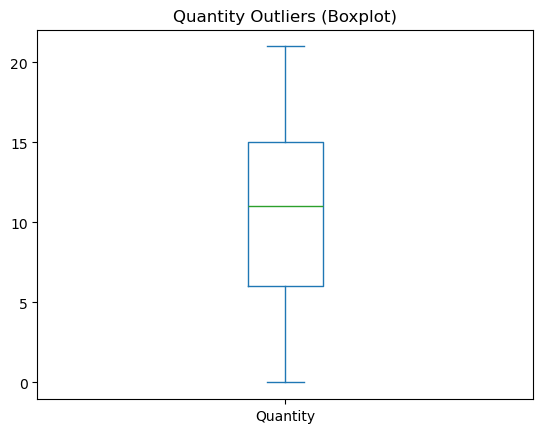

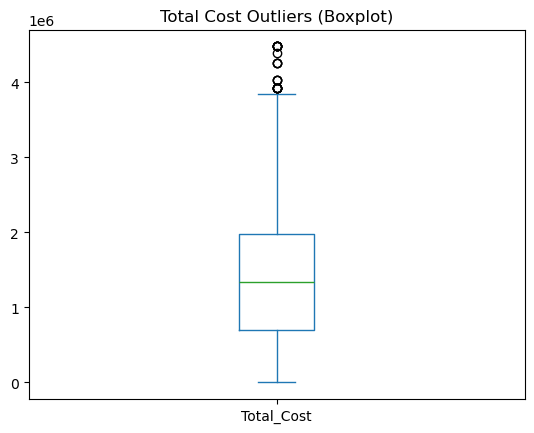

In [20]:
import matplotlib.pyplot as plt

plt.figure()
transactions["Quantity"].plot(kind="box")
plt.title("Quantity Outliers (Boxplot)")
plt.show()

plt.figure()
transactions["Total_Cost"].plot(kind="box")
plt.title("Total Cost Outliers (Boxplot)")
plt.show()

In [22]:
def iqr_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5 * iqr, q3 + 1.5 * iqr

q_low, q_high = iqr_bounds(transactions["Quantity"])
t_low, t_high = iqr_bounds(transactions["Total_Cost"])

transactions["qty_outlier"] = ((transactions["Quantity"] < q_low) | (transactions["Quantity"] > q_high)).astype(int)
transactions["cost_outlier"] = ((transactions["Total_Cost"] < t_low) | (transactions["Total_Cost"] > t_high)).astype(int)

transactions[["Quantity", "Total_Cost", "qty_outlier", "cost_outlier"]].head()

,Quantity,Total_Cost,qty_outlier,cost_outlier
0,11.0,1075200.0,0,0
5,4.0,627200.0,0,0
18,6.0,627200.0,0,0
21,11.0,392000.0,0,0
24,19.0,2660000.0,0,0


In [24]:
# Merge transactions with customers
data = transactions.merge(customers, on="Company_ID", how="left")

# Customer-level features
max_date = data["Transaction_Date"].max()

customer_features = data.groupby("Company_ID").agg(
    total_orders=("Transaction_ID", "count"),
    total_quantity=("Quantity", "sum"),
    total_spent=("Total_Cost", "sum"),
    avg_order_value=("Total_Cost", "mean"),
    unique_products=("Product_ID", "nunique"),
    last_purchase=("Transaction_Date", "max"),
    first_purchase=("Transaction_Date", "min"),
    qty_outlier_count=("qty_outlier", "sum"),
    cost_outlier_count=("cost_outlier", "sum"),
).reset_index()

# Extra useful features
customer_features["recency_days"] = (max_date - customer_features["last_purchase"]).dt.days
customer_features["customer_age_days"] = (customer_features["last_purchase"] - customer_features["first_purchase"]).dt.days
customer_features["avg_qty_per_order"] = customer_features["total_quantity"] / customer_features["total_orders"]

customer_features.head()

,Company_ID,total_orders,total_quantity,total_spent,avg_order_value,unique_products,last_purchase,first_purchase,qty_outlier_count,cost_outlier_count,recency_days,customer_age_days,avg_qty_per_order
0,1.0,14,157.0,2.220600e+07,1.586143e+06,9,2024-07-10,2020-12-08,0,0,110,1310,11.214286
1,2.0,22,205.0,2.945040e+07,1.338655e+06,12,2024-10-05,2021-01-15,0,1,23,1359,9.318182
2,3.0,14,195.0,2.883769e+07,1.802355e+06,10,2024-09-01,2020-12-23,0,0,57,1348,13.928571
3,4.0,23,218.0,3.219939e+07,1.399973e+06,16,2024-07-26,2020-12-17,0,0,94,1317,9.478261
4,5.0,11,104.0,1.550039e+07,1.291699e+06,10,2024-10-25,2020-11-27,0,0,3,1428,9.454545


In [26]:
snapshot_date = max_date - pd.Timedelta(days=30)

# Customers who bought in last 30 days (target=1)
buyers_last_30 = data.loc[data["Transaction_Date"] > snapshot_date, "Company_ID"].unique()

customer_features["will_buy_next_30d"] = customer_features["Company_ID"].isin(buyers_last_30).astype(int)

customer_features["will_buy_next_30d"].value_counts()

will_buy_next_30d
0    71
1    29
Name: count, dtype: int64

In [28]:
# Fill any remaining numeric NaNs
num_cols = customer_features.select_dtypes(include="number").columns
for c in num_cols:
    customer_features[c] = customer_features[c].fillna(customer_features[c].median())

# Save cleaned datasets + features
customers.to_csv("customers_clean.csv", index=False)
products.to_csv("products_clean.csv", index=False)
transactions.to_csv("transactions_clean.csv", index=False)
customer_features.to_csv("customer_features_ml.csv", index=False)

print("Saved files:")
print(" - customers_clean.csv")
print(" - products_clean.csv")
print(" - transactions_clean.csv")
print(" - customer_features_ml.csv")

Saved files:
 - customers_clean.csv
 - products_clean.csv
 - transactions_clean.csv
 - customer_features_ml.csv
